### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [3]:
df = pd.read_csv('data/marmiton.csv', index_col = 0)

In [4]:
df.head()

,name,cost,level,quantity,total_time,nb_of_ingredients,length_ingredients,beurre,oignon,oeuf,type
0,clafoutis aux abricots,1,1,4,60,7,132,60,No,4,Dessert
1,Gigot d'agneau à l'ail et au romarin,1,2,6,55,6,144,0,No,0,Plat principal
2,Ailerons de poulet confits au miel,2,1,4,65,10,227,0,No,0,Plat principal
3,Tuiles aux amandes,3,2,4,25,5,117,35,No,2,Dessert
4,Financiers au bon goût d'amande,1,1,15,30,6,165,100,No,4,Dessert


### Define the target

In [5]:
df['type'].value_counts()

Plat principal    219
Dessert           211
Entrée            128
Accompagnement     46
Boisson            26
Amuse-gueule       19
Confiserie         19
Sauce              18
Conseil             3
Name: type, dtype: int64

In [6]:
df['type'].unique()

array(['Dessert', 'Plat principal', 'Amuse-gueule', 'Entrée', 'Sauce',
       'Conseil', 'Accompagnement', 'Confiserie', 'Boisson'], dtype=object)

In [7]:
mask = df['type'].isin(['Entrée', 'Plat principal', 'Dessert'])
df = df[mask]

In [8]:
df['type'].value_counts(normalize = True)

Plat principal    0.392473
Dessert           0.378136
Entrée            0.229391
Name: type, dtype: float64

In [9]:
# Selecting Data and Target
X = df.iloc[:, 1:-1].copy()  # columns we are going to use to predict
y = df.iloc[:, -1].copy()    # the target is the last column of the dataframe

### Training and testing sets

In [10]:
# Splitting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 8)

### What about categories?

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 795
Data columns (total 9 columns):
cost                  558 non-null int64
level                 558 non-null int64
quantity              558 non-null int64
total_time            558 non-null int64
nb_of_ingredients     558 non-null int64
length_ingredients    558 non-null int64
beurre                558 non-null int64
oignon                558 non-null object
oeuf                  558 non-null int64
dtypes: int64(8), object(1)
memory usage: 43.6+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
X_train['oignon'] = lb_enc.fit_transform(X_train['oignon'])
X_test['oignon'] = lb_enc.transform(X_test['oignon'])

/home/sandrine/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sandrine/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
X_test['oignon'].head()

315    0
80     0
697    0
752    0
519    0
Name: oignon, dtype: int64

### Cross validation

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()

In [17]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=5)

print('scores: ', scores)
print('mean: ', scores.mean())

scores:  [0.60759494 0.65822785 0.64556962 0.5974026  0.55263158]
mean:  0.6122853162826514


### Parameter Tuning

In [18]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'max_depth':[2, 5, 10]}]

In [20]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_depth': [2, 5, 10], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 8, 'n_estimators': 10}

### Training

In [24]:
model = RandomForestClassifier(max_depth= 5, max_features= 8, n_estimators= 10)

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Prediction

In [26]:
y_pred = model.predict(X_test)

In [29]:
y_pred[:10]

array(['Dessert', 'Plat principal', 'Dessert', 'Entrée', 'Dessert',
       'Dessert', 'Plat principal', 'Plat principal', 'Dessert',
       'Dessert'], dtype=object)

In [30]:
model.score(X_test, y_test)

0.6785714285714286

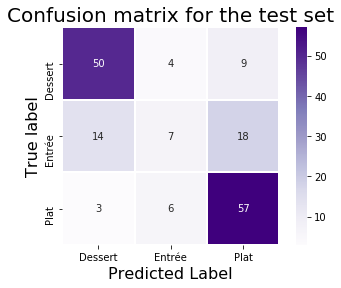

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
def plot_cm(matrix, labels):      
        sns.heatmap(matrix, annot = True, fmt='d', xticklabels = labels, yticklabels = labels,
                    square = True, linewidths=1, cmap = 'Purples')
        plt.xlabel('Predicted Label', fontsize=16)
        plt.ylabel('True label', fontsize=16)
        plt.title('Confusion matrix for the test set', fontsize=20)
        plt.show()
        
plot_cm(cm, ['Dessert', 'Entrée', 'Plat'])